## Finance and Risk Analytics - Capstone Project

### Business Case
- In the recent past, the industry of wealth management has seen a lot of growth. Every individual or business actively searches for opportunities to get the maximum returns. However, in most of the cases, they either lack the skills to identify the right investment opportunity, or there is a shortage of time for finding these opportunities. Hence, this gave rise to the dedicated individuals who perform this task on behalf of the investors for a commission - Portfolio managers.

- A portfolio manager makes investment decisions and carries out other related activities on behalf of vested investors. They work with a team of analysts and researchers, and their main objective is to realise the needs of the investor and suggest a suitable portfolio that meets all the expectations. They are responsible for establishing the best investment strategy, selecting appropriate investments along with the right allocation. However, in doing so, they face a lot of competition in the form of other portfolio managers and rival firms. Therefore, the portfolio manager has to use the available resources to provide the best solution to the investor.

- Consider yourself working for an associate at an investment firm that manages accounts for private clients. Your role requires you to analyse a portfolio of stocks to provide consultation on investment management based on client’s requirement.

### Business Requirement:
- Being a portfolio manager, the task is to provide consultation to two different investors, considered as Private Clients, i.e Mr Patrick Jyenger and Mr Peter Jyenger based on their requirements and financial objectives

- The primary goal of this Case Study:

    - To Suggest a Portfolio of stocks to Mr Patrick Jyenger based on his risk profile to meet his goal on doubling the amount of 500K Dollars in five years of timespan to buy a minoruty stake in Naturo.

    - To provide a High risk stock to Mr Peter Jyenger based on his risk profile to accomplish his goal on earning greater returns for the invested amount of 1 Million Dollars over a five years of timeframe to use it for the expansion of JWW.


- Preliminary Steps - Data loading
- Data Exploration
- Stock Analysis and Portfolio Management
- Reporting

### 1. Preliminary Steps
- Import the 25 separate files available in csv format
- Merge the stocks data into one file. For daily stock prices, use the Closung Price of stock.
- Apply data pre-processing steps

### ETL
- This section of the performs the preliminary steps mentioned in the below image

In [1]:
#Importing the necessary Libraries

import os
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set the directory containing your CSV files
directory_path = 'C:\\Users\\Sachin-W10\\Downloads\\iit_b_DS\\Final_Project\\DA_FinanceCapstone_Sachin_Sonavane\\dataset'

# Initialize an empty list to store individual DataFrames
dfs = []
filneames = os.listdir(directory_path)

# Iterate through all files in the directory
for filename in filneames:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
               
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Excluding empty rows
        df.dropna(how="all",inplace=True)
        
        # Add a new column called 'Ticker' 
        df['Ticker'] = filename.split('.')[0]
        
        # Append the DataFrame to the list
        dfs.append(df)
        
# Concatenate all DataFrames in the list into a single DataFrame
merged_df = pd.concat(dfs)

# Display the final DataFrame

print(f'Total files merged = {len(dfs)}')
print(f'Merged DF count = {len(merged_df)}')
merged_df.head(2)

Total files merged = 25
Merged DF count = 63642


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,01-10-2010,9.29,9.39,9.21,9.29,8.758067,3603800.0,AAL
1,04-10-2010,9.24,9.48,9.05,9.12,8.597802,3856800.0,AAL


### Check counts

In [ ]:
merged_df.groupby('Ticker').count()

### check null values  

In [3]:
merged_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64

### check column data type

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63642 entries, 0 to 2704
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       63642 non-null  object 
 1   Open       63642 non-null  float64
 2   High       63642 non-null  float64
 3   Low        63642 non-null  float64
 4   Close      63642 non-null  float64
 5   Adj Close  63642 non-null  float64
 6   Volume     63642 non-null  float64
 7   Ticker     63642 non-null  object 
dtypes: float64(6), object(2)
memory usage: 4.4+ MB


### update data type for below columns
 - Date: update from object to date 

In [5]:
merged_df["Date"]= pd.to_datetime(merged_df["Date"], format='%d-%m-%Y')
print(merged_df.info())
merged_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 63642 entries, 0 to 2704
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       63642 non-null  datetime64[ns]
 1   Open       63642 non-null  float64       
 2   High       63642 non-null  float64       
 3   Low        63642 non-null  float64       
 4   Close      63642 non-null  float64       
 5   Adj Close  63642 non-null  float64       
 6   Volume     63642 non-null  float64       
 7   Ticker     63642 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 4.4+ MB
None


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64

### Add Industry and Company Name columns

#### Read annex file

In [6]:
anne_filepath = directory_path+"\\meta\\Annexure-I.csv"

# Read the CSV file into a DataFrame
annex_df = pd.read_csv(anne_filepath)
annex_df = annex_df.apply(lambda x: x.str.strip())
#print(annex_df)

#### Join merged_df with annex on tikcer column 

In [7]:
# Merge DataFrames on the 'ID' column and check any columns having null value
merged_df_final = pd.merge(merged_df, annex_df, on='Ticker', how='left')
print(f"merged_df_final count = {len(merged_df_final)}")

merged_df_final.isnull().sum()

merged_df_final count = 63642


Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Ticker             0
Industry        2517
Company Name    2517
dtype: int64

In [8]:
#Imputing the missing values of Industry index s&p 500 and company name with Index - S&P 500 :

merged_df_final["Industry"] = np.where(merged_df_final['Industry'].isna(), 'Index - S&P 500', merged_df_final['Industry'])
merged_df_final["Company Name"] = np.where(merged_df_final['Company Name'].isna(), 'Index - S&P 500', merged_df_final['Company Name'])
merged_df_final.isnull().sum() # recheck the null count

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Ticker          0
Industry        0
Company Name    0
dtype: int64

In [9]:
#display data types of the column in dataframe 
#Lets make a copy for the data and fix the column type

dtypes = {'Date':'datetime64[ns]','Open':'float64', 'High':'float64', 'Low':'float64', 'Close':'float64', 
          'Adj Close':'float64', 'Volume':'float64', 'Ticker': 'object','Industry' :'object', 'Company Name':'object'}

merged_df_final = merged_df_final.astype(dtypes)

merged_df_final.to_csv("f_finance_analytics.csv",index=False)

In [10]:
merged_df_final.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Industry,Company Name
0,2010-10-01,9.29,9.39,9.21,9.29,8.758067,3603800.0,AAL,Aviation,American Airlines Group Inc
1,2010-10-04,9.24,9.48,9.05,9.12,8.597802,3856800.0,AAL,Aviation,American Airlines Group Inc


In [11]:
merged_df_final.shape

(63642, 10)

### 2. Exploratory Data Analysis

#### Data Explortion Task :
- Create interaction visualizations
    - Example Stock prices with and without normalization
- Perfom calculations of metrics and exploratory data analysis
    - Daily returns
    - Stock price dispersion from mean
    - Maximum and minimum prices during the specified period
    - Risk/Volatility
    - Correlation analysis of dauly returns among the stocks- within industry group and overall
    - Other metrics and relevant statistical measures
- Compare and contrast between the stocks,industry groups, overall portfolio,and S&P500 index.



**Analysis :**
- Here I have checked correlation of each stock with index S&P500.
- Analysis is done using Daily Price , Normalized Price and Relative Strenght. 
- Calcualting Portfolia Key metrics

f_finance_analytics  --> Using this file we have completed EDA by using Power Bi - Visualization of stocks

show(https://app.powerbi.com/links/Z8mHwLM7Op?ctid=78f415e7-ebd7-4bee-a9e0-ad0de64971b4&pbi_source=linkShare)

#### ***We've crafted a PowerBI dashboard titled 'Industry-Stocks VS S&P500' for analyzing stocks over the 5-year period from 2015 to 2020. The snapshot is provided below***

#### Daily Return

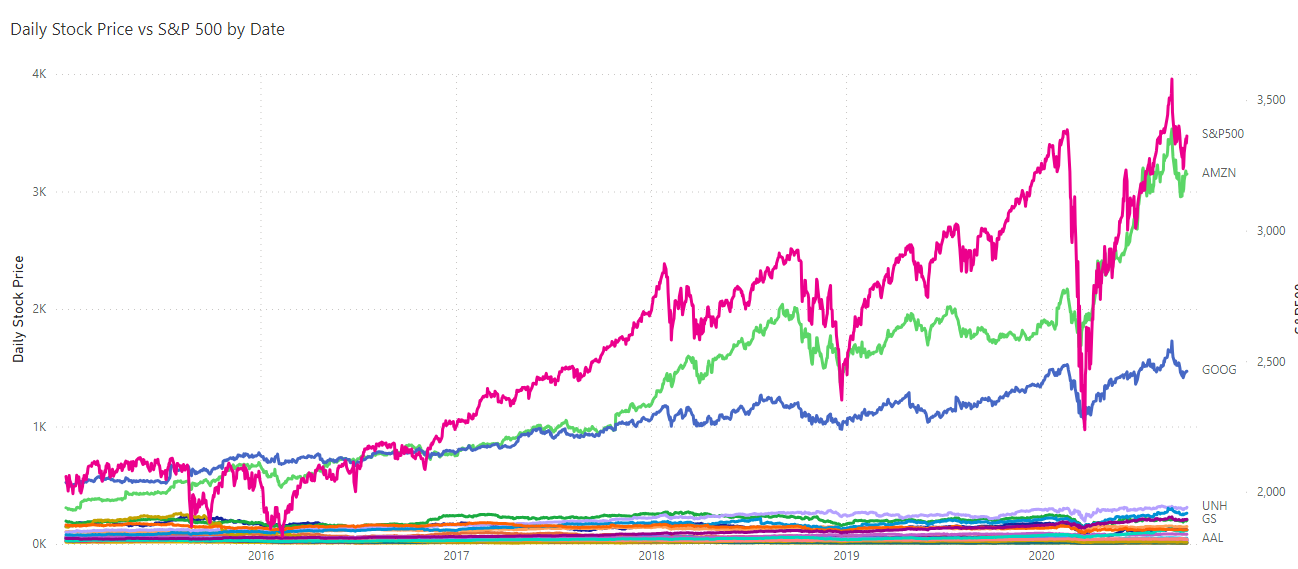

##### Normalized Price


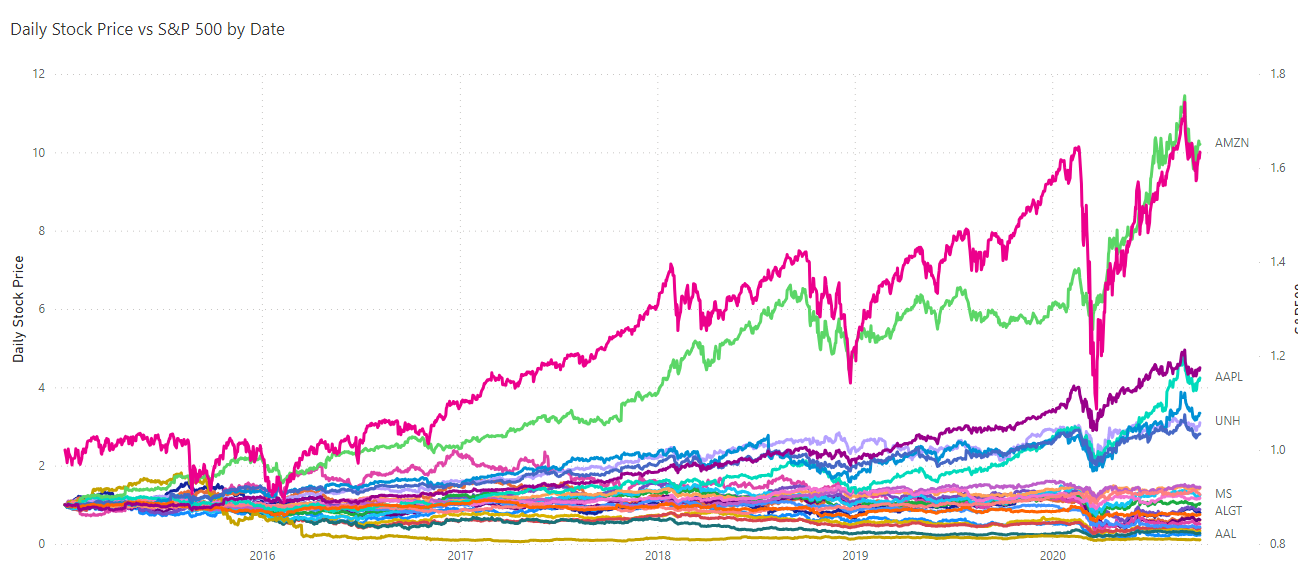

#### Relative Strenght

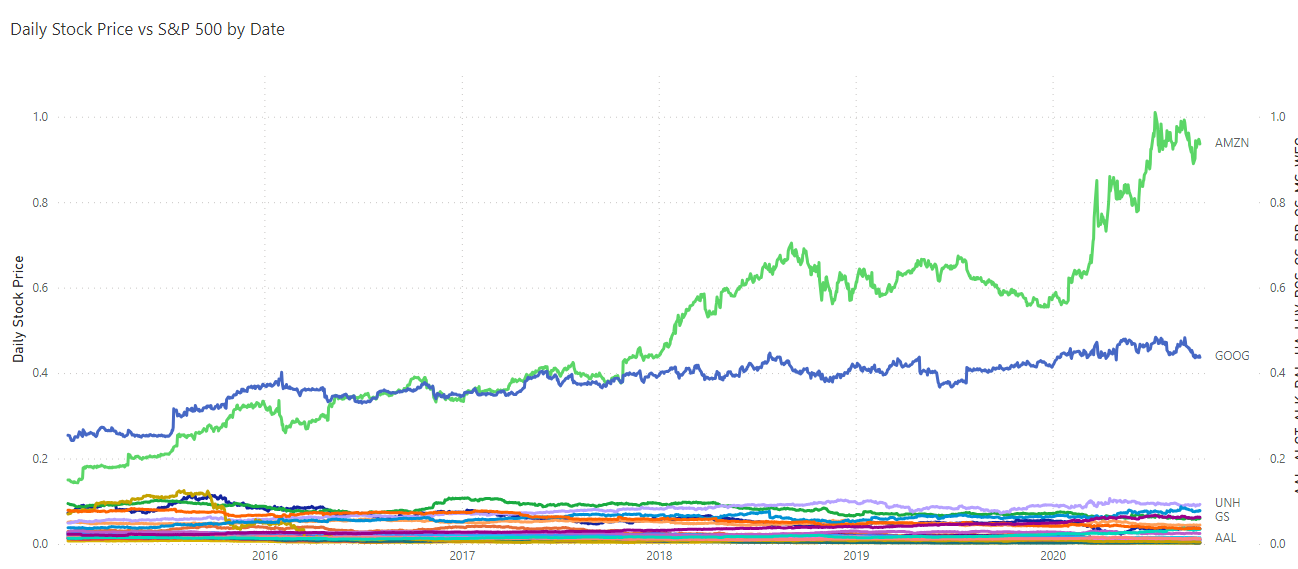

##### "All the above visual analysis of stock indexes are accessible through the Power BI tool."

### **Stock Analysis and Portfolio Management Task**

- Build an interactive dashboard showing the technical analysis of stocks done
- Post your analysis of the above stocks,create portfolios basis your choice of asset allocation
  which has the potential to meet the financial goals of both investors
    - Available capital with the investors
    - Perform equal allocation of capital for the desired stocks
    - Calculate the expected returns of the portfolio over the investment period (Active strategy -
      Assume that trends will be relicated for the next 5 years)
    - Estimate other key statistical metrics
    - (Note : Use 0.75% as the risk-free rate based on 10-year US Treasury bond yield)
- Explain your portfolio perfromance metrics with the help of appropriate visuals, and comment
  on your findings. Elaborate if the required goals could be achieved or not.
    
**Reporting**
- Present all your findings/insights/analysis/visuals in an executive report which will be
  presented to your investor.

### Calculating Portfolia Key Metrics

In [12]:
# Now, we will utilize the data from the past 5 years to make predictions for the upcoming 5 years.
df_5yr = merged_df_final.copy()

df_5yr = df_5yr[df_5yr['Date']>='2015-01-10']
df_5yr['Daily_Return'] = (df_5yr.sort_values(by=['Date'], ascending=True).groupby(['Ticker'])['Close'].pct_change(1))
df_5yr['Daily_Return'].fillna(value=0,inplace=True)
df_5yr.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Industry,Company Name,Daily_Return
1076,2015-01-12,51.060001,51.450001,49.200001,49.580002,46.977222,18261300.0,AAL,Aviation,American Airlines Group Inc,0.000000
1077,2015-01-13,50.119999,51.430000,49.459999,50.400002,47.754173,12259300.0,AAL,Aviation,American Airlines Group Inc,0.016539


In [13]:
# Pivot the DataFrame with pivot_table
pvt_df = pd.pivot_table(data = df_5yr, index=['Date'], columns=['Ticker'], values=['Close','Daily_Return'], aggfunc='max')

# Display the pivoted DataFrame
pvt_df.head(2)

Close                                                     \
Ticker            AAL     AAPL        ALGT        ALK        AMZN    BCS   
Date                                                                       
2015-01-12  49.580002  27.3125  154.360001  60.610001  291.410004  14.03   
2015-01-13  50.400002  27.5550  158.300003  61.410000  294.739990  14.02   

                                                                    \
Ticker             BHC         CS        DAL         DB         FB   
Date                                                                 
2015-01-12  155.500000  23.080000  46.060001  28.230000  76.720001   
2015-01-13  158.039993  23.120001  46.610001  28.700001  76.449997   

                                                                              \
Ticker            GOOG          GS         HA         IBM         JNJ    LUV   
Date                                                                           
2015-01-12  491.201416  185.070007  24.219999  156.440002  104.580002  40.25   
2015-01-13  494.821472  184.929993  24.370001  156.809998  104.760002  40.48   

                                                                   \
Ticker            MRK         MS       MSFT        PFE      RHHBY   
Date                                                                
2015-01-12  62.299999  36.369999  46.599998  32.770000  34.660000   
2015-01-13  62.189999  36.029999  46.360001  32.439999  34.810001   

                                               Daily_Return            \
Ticker           S&P500         UNH        WFC          AAL      AAPL   
Date                                                                    
2015-01-12  2028.260010  102.550003  52.049999     0.000000  0.000000   
2015-01-13  2023.030029  103.070000  51.849998     0.016539  0.008879   

                                                                        \
Ticker          ALGT       ALK      AMZN       BCS       BHC        CS   
Date                                                                     
2015-01-12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2015-01-13  0.025525  0.013199  0.011427 -0.000713  0.016334  0.001733   

                                                                       \
Ticker           DAL        DB        FB     GOOG        GS        HA   
Date                                                                    
2015-01-12  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
2015-01-13  0.011941  0.016649 -0.003519  0.00737 -0.000757  0.006193   

                                                                       \
Ticker           IBM       JNJ       LUV       MRK        MS     MSFT   
Date                                                                    
2015-01-12  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
2015-01-13  0.002365  0.001721  0.005714 -0.001766 -0.009348 -0.00515   

                                                             
Ticker          PFE     RHHBY    S&P500       UNH       WFC  
Date                                                         
2015-01-12  0.00000  0.000000  0.000000  0.000000  0.000000  
2015-01-13 -0.01007  0.004328 -0.002579  0.005071 -0.003842

In [14]:
# calculating the Beta value

def bet_calculator(stock_name):
    market_index_symbol = 'S&P500'  # S&P 500 index symbol
    stock_data = pvt_df['Close'][stock_name]
    market_data = pvt_df['Close'][market_index_symbol]
    # Combine the stock and market data into a single DataFrame
    data = pd.concat([stock_data, market_data], axis=1)
    data.columns = [stock_name, market_index_symbol]

    # Calculate daily returns
    returns = data.pct_change(1).fillna(0)

    # Calculate covariance matrix
    cov_matrix = np.cov(returns[market_index_symbol], returns[stock_name])

    # Calculate beta
    beta = cov_matrix[0, 1] / cov_matrix[1, 1]
    

    return beta

### Calculating the key metrics of the stock 
- Mean_Daily_Return
- Cumulative_Return
- Risk
- Beta
- Sharp Ratio
- Annualized_Return

In [15]:

stocks = df_5yr['Ticker'].unique().tolist()

key_metrics = []

for stock_name in stocks:

    # Find the index of the first non-null value in the 'Close' column
    first_valid_index = pvt_df['Close'][stock_name].first_valid_index()

    # Use the index to get the first non-null value in the 'Price' column
    original_stock_price = pvt_df['Close'][stock_name][first_valid_index]
    
    #print(stock_name,original_stock_price)

    # Find the index of the first non-null value in the 'Price' column
    last_valid_index = pvt_df['Close'][stock_name].last_valid_index()

    # Use the index to get the first non-null value in the 'Price' column
    current_price = pvt_df['Close'][stock_name][last_valid_index]
    
    #print(stock_name,current_price)

    cum_ret = (current_price - original_stock_price)/original_stock_price
    
    #print(stock_name,cum_ret*100)
    
    mean_daily_ret = pvt_df['Daily_Return'][stock_name].mean()
    risk = pvt_df['Daily_Return'][stock_name].std()
    beta = bet_calculator(stock_name)
    
    key_metrics.append((stock_name, mean_daily_ret,cum_ret,risk,beta))

km_df = pd.DataFrame(key_metrics, columns =['Ticker', 'Mean_Daily_Return','Cumulative_Return',"Risk","Beta"])
km_df['Annualized_Return'] = km_df['Mean_Daily_Return']*252
km_df['Sharp_Ratio'] = np.round((km_df['Annualized_Return']-0.075)/(np.sqrt(252)*km_df['Risk']),2)


km_df

,Ticker,Mean_Daily_Return,Cumulative_Return,Risk,Beta,Annualized_Return,Sharp_Ratio
0,AAL,-0.000419,-0.752118,0.033561,0.167746,-0.105640,-0.34
1,AAPL,0.001175,3.240183,0.018517,0.473683,0.296001,0.75
2,ALGT,0.000226,-0.223892,0.028179,0.221325,0.056949,-0.04
3,ALK,-0.000005,-0.395644,0.026057,0.258902,-0.001323,-0.18
4,AMZN,0.001840,9.805154,0.019456,0.349788,0.463727,1.26
5,BCS,-0.000414,-0.642908,0.024234,0.300091,-0.104271,-0.47
6,BHC,-0.000637,-0.900064,0.042714,0.105241,-0.160509,-0.35
7,CS,-0.000330,-0.568024,0.022327,0.353949,-0.083227,-0.45
8,DAL,0.000051,-0.336083,0.025722,0.260071,0.012953,-0.15
9,DB,-0.000479,-0.702444,0.026892,0.250857,-0.120806,-0.46


In [16]:
# Resetting the index and sorting by cumulative return to identify the top stocks and their associated risks.

km_df.sort_values(by='Cumulative_Return' ,ascending=False,inplace=True)
km_df.set_index('Ticker')

,Mean_Daily_Return,Cumulative_Return,Risk,Beta,Annualized_Return,Sharp_Ratio
Ticker,,,,,,
AMZN,0.001840,9.805154,0.019456,0.349788,0.463727,1.26
MSFT,0.001201,3.513520,0.017587,0.544300,0.302610,0.82
AAPL,0.001175,3.240183,0.018517,0.473683,0.296001,0.75
FB,0.001052,2.413712,0.019893,0.374753,0.264997,0.60
UNH,0.000926,2.040175,0.017518,0.469759,0.233325,0.57
GOOG,0.000903,1.991848,0.016942,0.509377,0.227675,0.57
S&P500,0.000421,0.658071,0.011810,NaN,0.106120,0.17
JNJ,0.000320,0.423599,0.012244,0.634766,0.080710,0.03
MRK,0.000296,0.331461,0.013986,0.528505,0.074657,-0.00


***At the end of 5 years we can see that top 6 stocks having returns greater than S&P500:***

    - AMZN gives 46.37% annual returns.
    - MSFT gives 30.26% annual returns.
    - AAPL gives 29.60% annual returns.
    - FB gives 26.50% annual returns.
    - UNH gives 23.33% annual returns.
    - GOOG gives 22.77% annual returns.
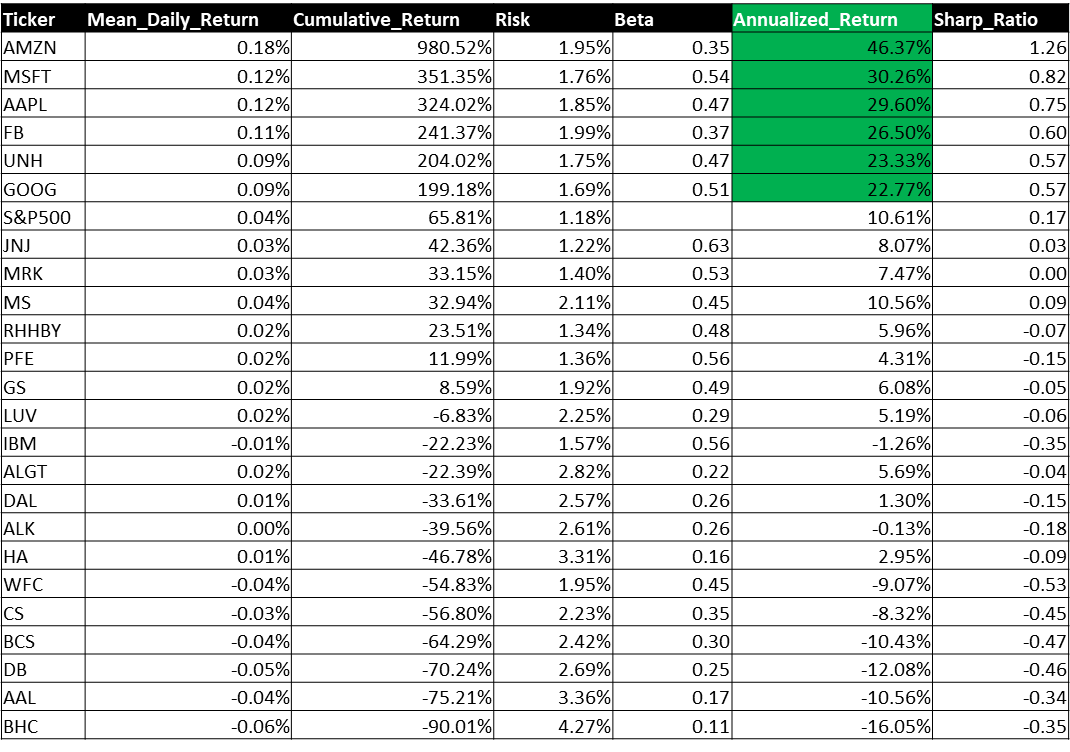

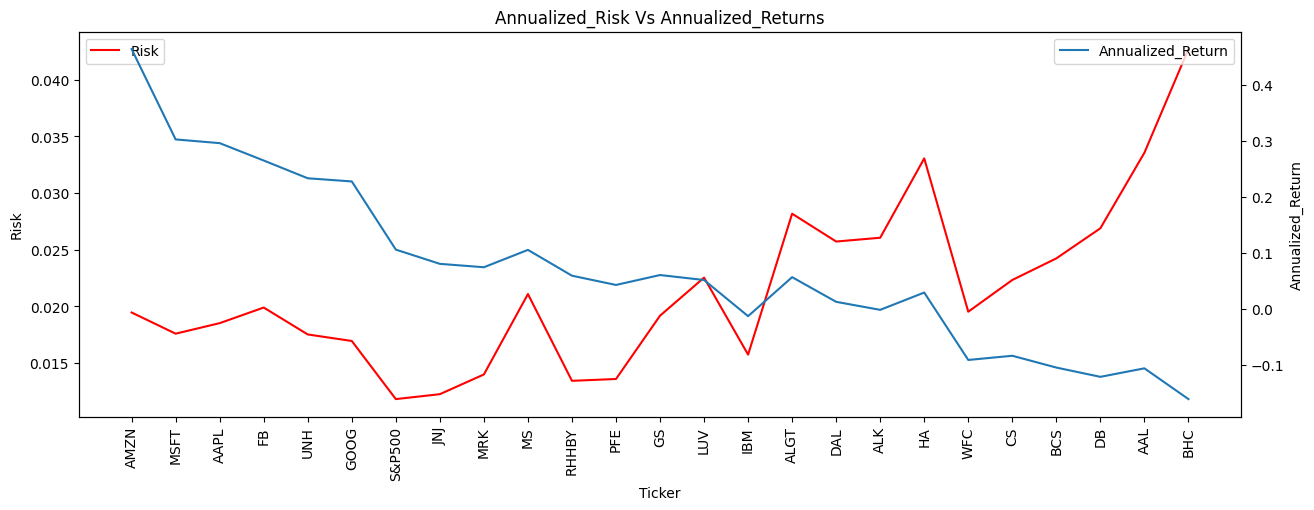

In [17]:
# Line chart showing Risk vs Annualized_Return of stocks

plt.figure(figsize=(15,5))
sns.lineplot(x=km_df['Ticker'],y=km_df['Risk'], label="Risk",color='Red')

plt.xticks(rotation=90)

# Creating a secondary y-axis for Annualized Returns
ax2 = plt.gca().twinx()
sns.lineplot(x=km_df['Ticker'],y=km_df['Annualized_Return'], label="Annualized_Return",ax=ax2)


# Add label for horizontal axis
plt.title("Annualized_Risk Vs Annualized_Returns")

plt.show()

1. **Top Performing Stocks in Annualized Returns:**
   - AMZN
   - MSFT
   - AAPL
   - FB
   - UNH

2. **Annualized Returns and Risk Analysis:**
Each of the top 5 stocks demonstrates an annualized return exceeding 20%, maintaining a moderate risk level compared to other equities.

3. **Risk and Financial Losses:**
The probability of financial losses and diminishing the initial investment rises with declining returns.

4. **Higher Associated Risks Due to Lack of Disclosure:**
BHC, BCS, DB, CS, and WFC face higher associated risks due to the absence of disclosed return on investment at the time of investing.

5. **Risk-Return Relationship:**
Companies with elevated risk profiles generally offer diminished returns on investment. Nevertheless, certain stocks provide risk-free investment   opportunities, even with lower returns.

6. **Commendable Returns with Minimal Risk:**
JNJ, RHHBY, and MRK stocks deliver commendable returns with minimal associated risk.


### Portfolio Recommendation

In [18]:
# creating class for portfolio to select the stock and checked the risk , ROI and retun 

def analyse_pf(initial_investment_amt,pf_stocks):
    ps_df = pd.DataFrame(pf_stocks,columns =['Ticker', 'Weight'])
    ps_df['Initial_Invested_Amt'] = initial_investment_amt * ps_df['Weight']

    # Derive portfolio beta
    ps_df_beta = ps_df.merge(km_df[['Ticker','Beta']],how='inner',on='Ticker')
    ps_df_beta['Beta'] = ps_df_beta['Weight']*ps_df_beta['Beta']
    ps_df_beta['Beta'] = ps_df_beta['Beta'].sum()
    ps_beta = ps_df_beta['Beta'].max()

    p_stocks = ps_df_beta['Ticker'].unique().tolist()
    filtered_pvt_df = df_5yr[df_5yr['Ticker'].isin(p_stocks)][['Date','Ticker','Daily_Return']]
    
    
    pt_df = (filtered_pvt_df
         .merge(ps_df_beta,how='inner',on='Ticker')
         
       .sort_values(by=['Ticker','Date'],ascending=True)
    )

    pt_df['Daily_Return_Amt'] = (1 + pt_df.groupby('Ticker')['Daily_Return'].cumsum()) * pt_df['Initial_Invested_Amt']
    
    # Pivot the DataFrame with pivot_table
    pt_pvt_df = (pd.pivot_table(data = pt_df, 
                                   index=['Date'], 
                                   columns=['Ticker'], 
                                   values=['Daily_Return_Amt'], 
                                   aggfunc={'Daily_Return_Amt':np.sum},
                                   fill_value=0,
                                   dropna=False)
    )

    # Display the pivoted DataFrame
    pt_pvt_df.columns = pt_pvt_df.columns.droplevel(0)
    pt_pvt_df.reset_index().set_index('Date')
    pt_pvt_df.columns.name = None
    pt_pvt_df['Portfolio_Amt'] = pt_pvt_df.sum(axis=1)
    
    pt_pvt_df['Portfolio_Return'] = pt_pvt_df['Portfolio_Amt']/initial_investment_amt-1
    pt_pvt_df['Mean_Portfolio_Return'] = pt_pvt_df['Portfolio_Return'].mean()
    pt_pvt_df['Annualized_Return'] = pt_pvt_df['Mean_Portfolio_Return']*252

    # Find the index of the first non-null value in the 'Price' column
    last_valid_index = pt_pvt_df['Portfolio_Amt'].last_valid_index()

    # Use the index to get the first non-null value in the 'Price' column
    current_price = pt_pvt_df['Portfolio_Amt'][last_valid_index]

    pt_pvt_df['Cumulative_Return'] =  (current_price - initial_investment_amt)/initial_investment_amt
    pt_pvt_df['Risk'] = pt_pvt_df['Portfolio_Return'].std()
    pt_pvt_df['Sharp_Ratio'] = np.round((pt_pvt_df['Annualized_Return']-0.075)/(np.sqrt(252)*pt_pvt_df['Risk']),2)
    pt_pvt_df['Beta'] = ps_beta
    pt_pvt_df['CAPM'] = 0.01+pt_pvt_df['Beta']*(pt_pvt_df['Annualized_Return']-0.075)

    final_df = pt_pvt_df.tail(1)
    
    return final_df,pt_pvt_df

#### Mr. Patrick Jyengar Portfolio

- Mr. Patrick Jyengar wants to double his investment in the span on 5 years. He wants to invest in low risk stocks which would fetch him decent returns.
- As per his profile Low risk stocks like JNJ,RHHBY and GOOG is suitable to invest on. But overall returns with these three stocks wouldn't reach the target what Mr.Patrick is investing for. So one portion of his wealth can be invested on MSFT to gain the desired returns.
- Lets calculate the Risk and Returns associated with the above mentioned portfolio.

### Design Portfolio
- Mr. Patrick Jyengar
    
    - initial_investment_amt = 500000

In [19]:

initial_investment_amt = 500000

pf_stocks = [('MSFT',0.30),('JNJ',0.20),('RHHBY',0.20),('GOOG',0.30)]
final_df, detail_df =  analyse_pf(initial_investment_amt,pf_stocks)

# calculating the total return on investment:

Total_Return = round(final_df['Portfolio_Amt'][-1],2)
Cumulative_Return = round(final_df['Cumulative_Return'][-1]*100,2)
Earning   = round(Total_Return-initial_investment_amt,2)
print(f"""
    Mr. Patrick Jyengar Portfolio
        Stocks (Ticker,Weight): {pf_stocks}
        Invested Amount : {initial_investment_amt}
        Total Return  : {Total_Return}
        Earning : {Earning}
        ROI : {Cumulative_Return}%""")


    Mr. Patrick Jyengar Portfolio
        Stocks (Ticker,Weight): [('MSFT', 0.3), ('JNJ', 0.2), ('RHHBY', 0.2), ('GOOG', 0.3)]
        Invested Amount : 500000
        Total Return  : 1035072.86
        Earning : 535072.86
        ROI : 107.01%


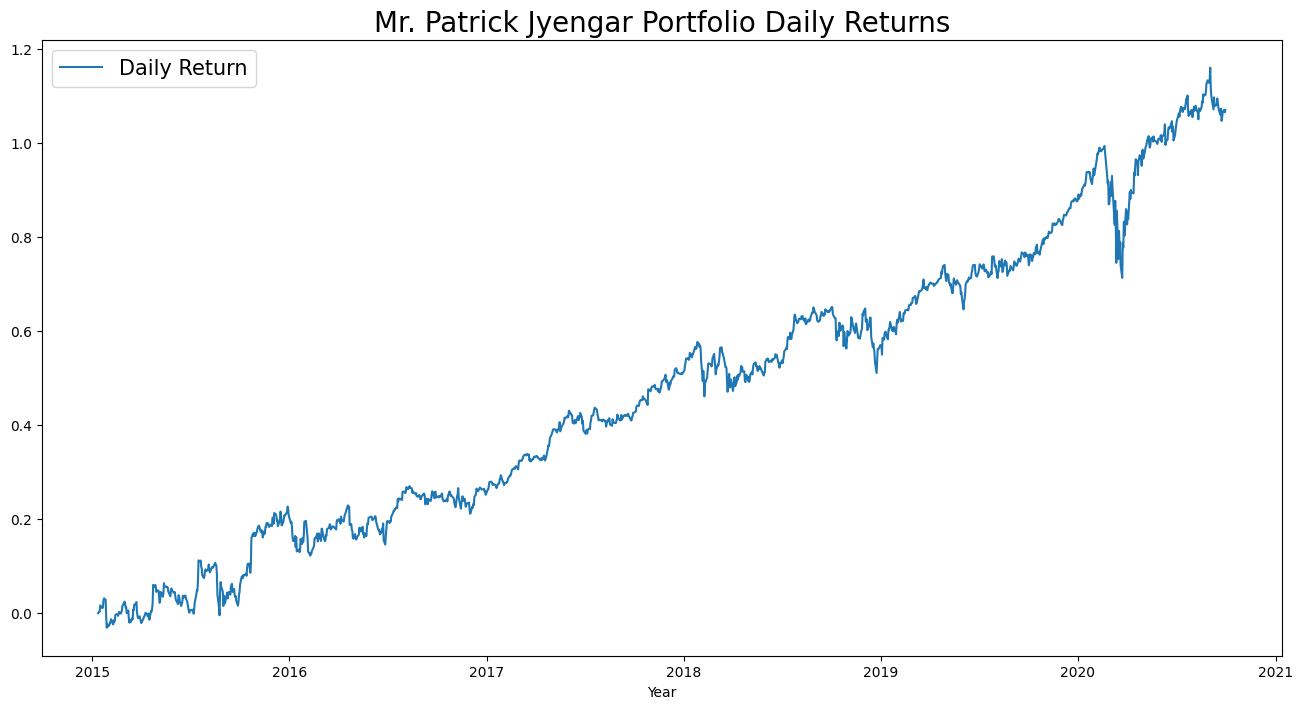

In [20]:
# Lets Plot the graph
plt.figure(figsize=(16,8))
plt.plot(detail_df['Portfolio_Return'], label= 'Daily Return')
plt.title('Mr. Patrick Jyengar Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.xticks(rotation=0)
plt.xlabel("Year")
plt.show()


Over the past 5 years, Mr. Patrick Jyengar's well-balanced portfolio, featuring MSFT, JNJ, RHHBY, and GOOG, exhibited robust performance. With an initial investment of 500,000, the total return soared to 1,035,072.86, yielding earnings of 535,072.86 and an impressive Return on Investment (ROI) of 107.01%. The strategic distribution of weights among diverse stocks underscored the portfolio's resilience and success. This substantial gain reflects the effectiveness of Mr. Jyengar's investment choices and signifies a notable achievement in wealth accumulation over the specified period.

#### Mr. Peter Jyengar Portfolio

- Mr. Peter Jyengar on the other hand Consistent with his attitude towards risk, he prefers high-return investments. Believes that he can still bounce back in case of any occasional losses. 
- He Wants to invest 1 million dollar from company's cash and cash equivalents in the most high-margin stocks Expects high returns within 5 years for inorganic expansion of his company. 
- As per his profile High risk/High Returns stocks like AMZN, MSFT and AAPL is suitable to invest on. 
- Overall returns with these stocks would fetch him Maximum returns and also cater the Risk.

In [21]:
initial_investment_amt = 1000000
pf_stocks = [('AMZN',0.75),('MSFT',0.30),('AAPL',0.20)]

final_df, detail_df =  analyse_pf(initial_investment_amt,pf_stocks)

# calculating the total return on investment:

Total_Return = round(final_df['Portfolio_Amt'][-1],2)
Cumulative_Return = round(final_df['Cumulative_Return'][-1]*100,2)
Earning   = round(Total_Return-initial_investment_amt,2)
print(f"""
    Mr. Peter Jyengar Portfolio
        Stocks (Ticker,Weight): {pf_stocks}
        Invested Amount : {initial_investment_amt}
        Total Return  : {Total_Return}
        Earnings : {Earning}
        ROI : {Cumulative_Return}%""")


    Mr. Peter Jyengar Portfolio
        Stocks (Ticker,Weight): [('AMZN', 0.75), ('MSFT', 0.3), ('AAPL', 0.2)]
        Invested Amount : 1000000
        Total Return  : 4096424.66
        Earnings : 3096424.66
        ROI : 309.64%


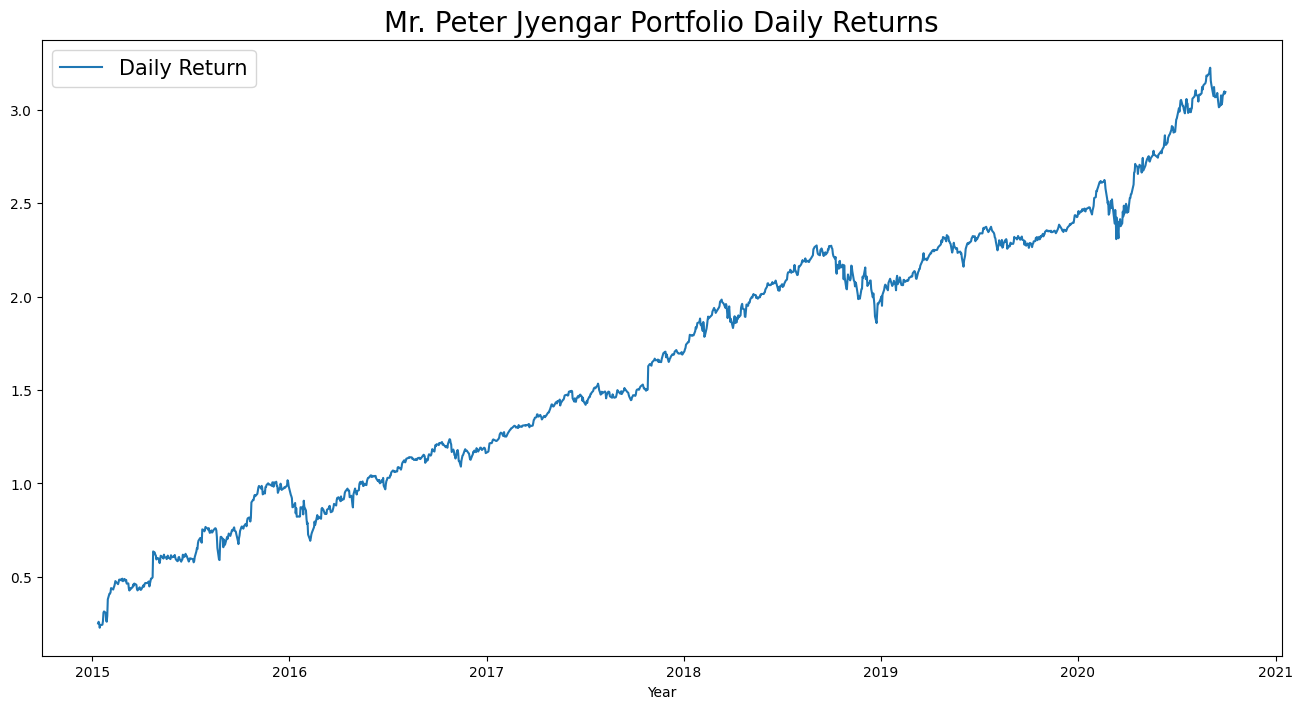

In [22]:
# Lets Plot the graph
plt.figure(figsize=(16,8))
plt.plot(detail_df['Portfolio_Return'], label= 'Daily Return')
plt.title('Mr. Peter Jyengar Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.xticks(rotation=0)
plt.xlabel("Year")
plt.show()

#### 
Over the past 5 years, Mr. Peter Jyengar's portfolio, primarily composed of AMZN, MSFT, and AAPL, exhibited exceptional performance. With an initial investment of 1,000,000, the total return reached 4,096,424.66, resulting in earnings of 3,096,424.66 and an impressive ROI of 309.64%.

----------                   ------------------------       ---------------------*****END Analysis****------------------------------------         ---------